In [3]:
from plotDensity import *
import matplotlib.pyplot as plt
import numpy as np
filename =  './results/prob_0.000000/X_10_Y_10/seed_42/log_density_10_10_p0_i4.txt'

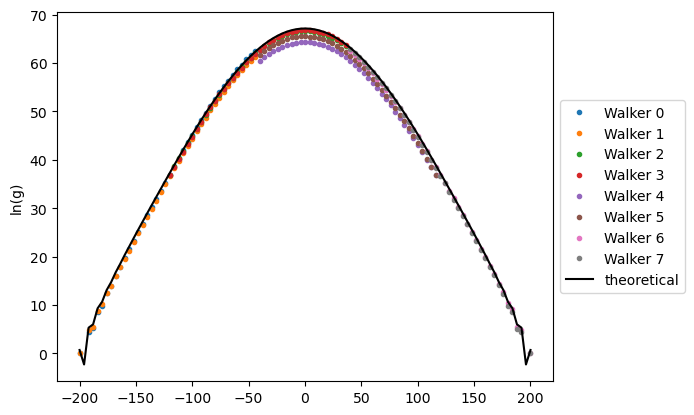

In [14]:
walker_results = read_data_from_file(filename) 
plt.figure()
concat_val = 0
for i, res in enumerate(walker_results):
    y = (np.array(list(res.values())))
    x = (np.array(list(res.keys())))
    y -= min(y)
    if i == 0:
        concat_val = y[len(y)//2]
    #middle intervals
    if i in [2,3,4,5]:
        y += concat_val 
    plt.plot(x, y,'.',label='Walker %d'%i)
    
#Exact values for comparison
Ising_exact_10 = [2,0,200,400,10900,42400,470800,2446000,18360550,104898400,661690020,3795698800,22034852500,123245870800,683159390400,3718754445040,20039066440650,106869414763600,565342738635100,2965410781244400,15405584913262690,79058880139235600,399395153508928800,1978268816096841200,9567275173644469900,44993732156949482640,204996272846374451700,901771726321871878400,3818447262814345815750,15521505438601441344400,60416992231869201757680,224675372902253123649600,796449241264723817527000,2685472762835853806911600,8594070000931984902273800,26045903665842111978911360,74589262820285320332481650,201386616277247037998656800,511462591776216629495232000,1219084512707365081484500800,2720830165558895878333744420,5673351930485549580077962400,11027927457666363037491421800,19940841900643803487283520000,33474678002148243364888022800,52072075580116657291967501760,74934674051996125381350068000,99614760763279598546786182400,122185044739938936480476461300,138162176231126017850918100800,143947977631559776839143485352,138162176231126017850918100800,122185044739938936480476461300,99614760763279598546786182400,74934674051996125381350068000,52072075580116657291967501760,33474678002148243364888022800,19940841900643803487283520000,11027927457666363037491421800,5673351930485549580077962400,2720830165558895878333744420,1219084512707365081484500800,511462591776216629495232000,201386616277247037998656800,74589262820285320332481650,26045903665842111978911360,8594070000931984902273800,2685472762835853806911600,796449241264723817527000,224675372902253123649600,60416992231869201757680,15521505438601441344400,3818447262814345815750,901771726321871878400,204996272846374451700,44993732156949482640,9567275173644469900,1978268816096841200,399395153508928800,79058880139235600,15405584913262690,2965410781244400,565342738635100,106869414763600,20039066440650,3718754445040,683159390400,123245870800,22034852500,3795698800,661690020,104898400,18360550,2446000,470800,42400,10900,400,200,0,2]
exact_log = [np.log(float(max(x,0.1))) for x in Ising_exact_10] #max(x,0.1) just to avoid log(0)
x_vals = np.linspace(-200, 200, len(exact_log))
plt.plot(x_vals, exact_log,color='black',label='theoretical')
plt.ylabel('ln(g)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()